In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("trimmedDataWithLuminosity.csv")
cols = ["EXTraS_Ape_v0.XMM_EP_8_FLUX", "EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR"]
num_cols = data.select_dtypes(include="number").columns
data.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity
0,411780701,329.717000,-30.225400,2.5243e-11,6.0745e-14,QSO B2155-304,329.716938,-30.225588,BLL,BLLac,UV|X|V*|AGN|smm|Opt|cm|Bla|BL?|G|gam|NIR|*|QSO|MIR|BLL|Rad|Bz?,0.015800,0.019100,13.360000,13.090000,12.620000,11.398000,10.460000,10.134000,nan,nan,nan,nan,nan,63291.139241,206427.848101,195296049367088514465792.000000,12098673429095002186147827443688275968.000000,87409269821769387497756395162623279104.000000
1,412580801,82.187000,-65.448200,5.6507e-11,2.0452e-13,V* AB Dor,82.186963,-65.448666,TT*,TTauri*,UV|V*|X|PM*|Er*|Ro*|NIR|IR|*|MIR|**|TT*|Em*,67.333100,0.441400,7.856000,6.999000,6.496000,5.316000,4.845000,4.686000,nan,nan,nan,nan,nan,14.851537,48.439178,45827053559096492032.000000,1491279526343945737254163447808.000000,1135619864130781541514532639211520.000000
2,412981701,15.779800,-71.860800,4.2829e-14,1.8823e-14,2MASS J01030720-7151420,15.780000,-71.861653,RB?,RGB*_Candidate,NIR|*|MIR|RB?,1.840600,0.034200,17.960000,16.620000,nan,14.111000,13.399000,13.156000,nan,nan,nan,nan,nan,543.301097,1772.009127,1676452015647071666176.000000,1512624261784524216498267357184.000000,371240176102921007195071577063424.000000
3,412981701,15.409200,-71.903600,2.7227e-14,1.4413e-14,UCAC4 091-002858,15.407673,-71.904531,*,Star,X|NIR|*,11.182700,0.198700,13.060000,11.880000,11.700000,9.890000,9.320000,9.180000,nan,nan,nan,nan,nan,89.423842,291.661227,275933144947105792000.000000,26050675585787850811217281024.000000,487392048283855364600038537822208.000000
4,412982301,15.899500,-72.056400,1.1078e-14,3.6656e-15,SMC AB 7,15.899684,-72.056144,WR*,WolfRayet*,X|V*|SB*|*|MIR|s?b|WR*,0.016900,0.025200,12.954000,13.016000,nan,13.430000,13.420000,13.420000,nan,nan,nan,nan,nan,59171.597633,192991.715976,182584472189349205639168.000000,4640739077872119731025062068748288.000000,58263644192231006011339433925329027072.000000
5,414180601,80.807300,-69.561100,2.0892e-14,6.4129e-15,TYC 9166-446-1,80.806721,-69.561978,*,Star,X|NIR|*|MIR,4.464000,0.010500,11.250000,10.850000,10.490000,9.789000,9.594000,9.540000,nan,nan,nan,10.527000,nan,224.014337,730.636201,691236017025089536000.000000,125444292856106634717194878976.000000,1820359725314401885252143787540480.000000
6,414180601,80.941600,-69.697100,1.2367e-14,6.2521e-15,OGLE LMC-LPV-50288,80.943140,-69.697316,LP*,LongPeriodV*,NIR|*|LP*,0.003500,0.030400,nan,16.703000,nan,13.777000,12.943000,12.742000,nan,nan,nan,nan,nan,285714.285714,931874.285714,881622165714285583400960.000000,120788383451399675168473119817990144.000000,120592266802406685678934244083676217344.000000
7,414180601,81.771300,-69.522200,9.6095e-15,1.0400e-14,OGLE LMC-SC4 462368,81.768445,-69.521537,RR*,RRLyrae,RR*|V*|RR?|*,0.240100,0.401700,19.770000,19.390000,nan,nan,nan,nan,nan,nan,nan,nan,nan,4164.931279,13584.173261,12851635068721365516288.000000,19944634334184735750559149064192.000000,210968686177686102473982663983104.000000
8,414191001,187.155000,1.955660,8.4888e-14,1.3661e-14,GSC 00282-00187,187.155037,1.955627,Em*,EmLine*,X|PM*|Opt|NIR|*|Em*,6.235900,0.047900,nan,13.770000,nan,10.901000,10.263000,10.037000,17.195000,14.684000,13.341000,14.642000,12.134000,160.361776,523.029555,494824737407591514112.000000,261192382870865249550026670080.000000,488467628167458493876357180686336.000000
9,414191001,187.472000,2.136850,2.1000e-13,3.9609e-14,QSO B1227+0224,187.472191,2.136647,QSO,QSO,X|AGN|Opt|*|QSO|Rad,0.526200,0.635000,20.170000,19.950000,nan,nan,nan,nan,20.440000,20.029000,19.930000,19.653000,19.711000,1900.418092,6198.327632,5864077499049791455232.000000,90745356798305280583393293107200.000000,8817382017324830278835639418880.000000


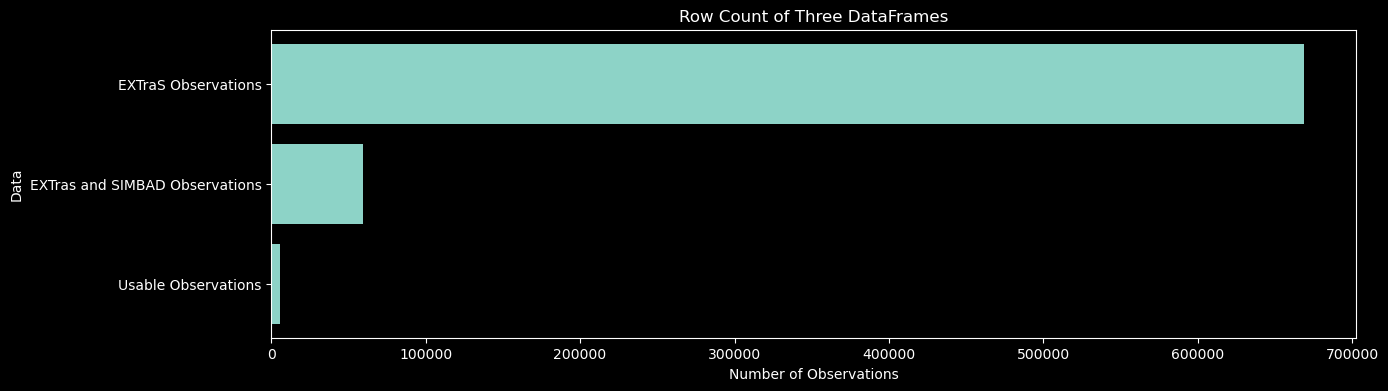

In [40]:
bigData=pd.read_csv("headedBigData.csv")
crossData=pd.read_csv("quarterCrossHeadedBigData.csv")
count_df3 = len(bigData)
count_df2 = len(crossData)
count_df1 = len(data)
counts = [count_df1, count_df2, count_df3]
labels = ['Usable Observations', 'EXTras and SIMBAD Observations', 'EXTraS Observations']

plt.figure(figsize=(14,4))
plt.barh(labels, counts)
plt.xlabel('Number of Observations')
plt.ylabel('Data')
plt.title('Row Count of Three DataFrames')
plt.show()

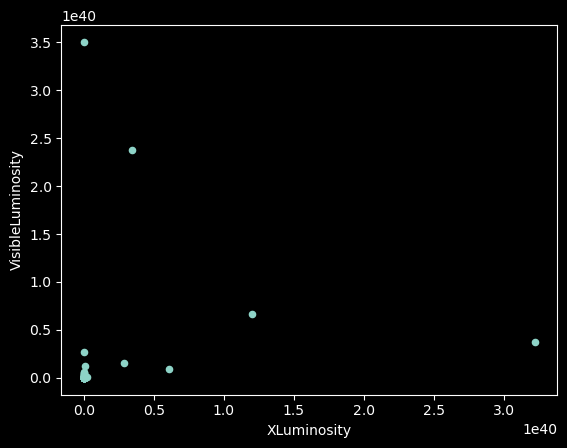

In [4]:
x='XLuminosity'
y='VisibleLuminosity'
plt.style.use('dark_background') 
data.plot.scatter(x,y)
plt.show() #Questo plot non ci dice niente, proviamo a guardare la scala logaritmica

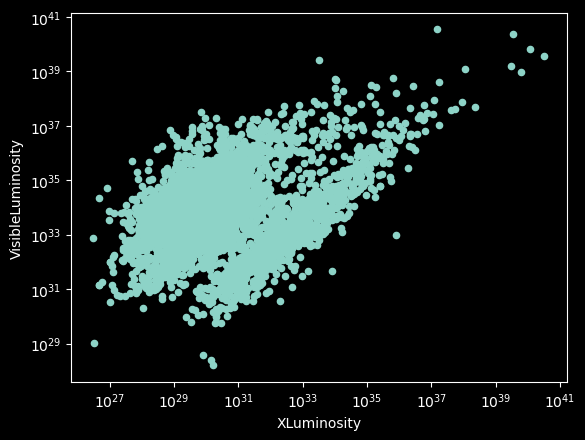

In [5]:

data.plot.scatter(x,y)
plt.xscale("log")
plt.yscale("log")
plt.show()
#mentre è più interessante, uno scatterplot default è abbastanza inutilizzabile

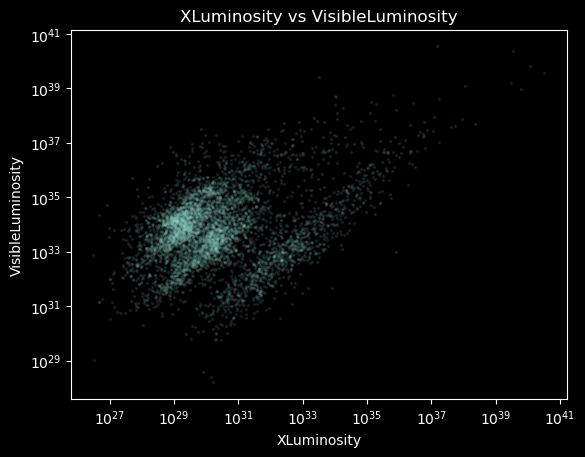

In [6]:
data.plot.scatter(x,y, s=2, alpha=0.1)
plt.xscale("log")
plt.yscale("log")
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()
#un paio di grafici coi punti ridotti di dimensione e semitrasparenti

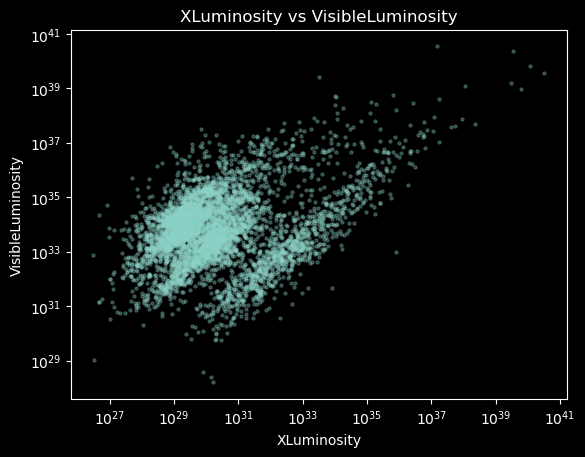

In [7]:

data.plot.scatter(x,y, s=5, alpha=0.3)
plt.xscale("log")   
plt.yscale("log")   
plt.title("XLuminosity vs VisibleLuminosity")
plt.show()

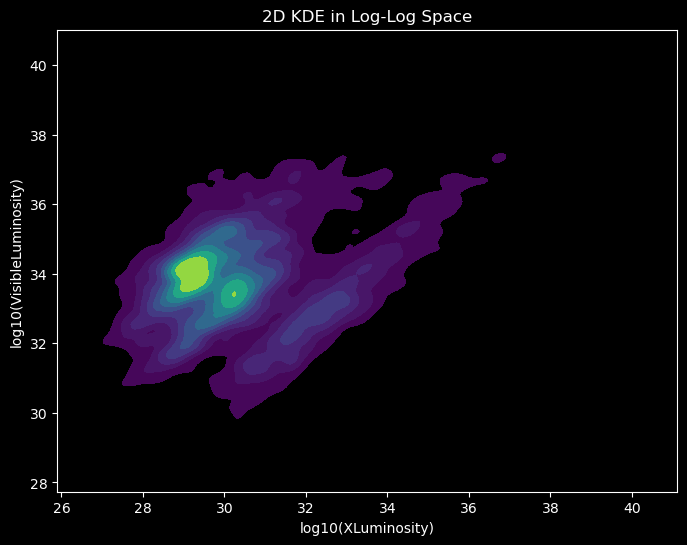

In [8]:
import seaborn as sns
# Remove non-positive values for log scale
x = data["XLuminosity"].values
y = data["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Take log10 of the data
log_x = np.log10(x)
log_y = np.log10(y)

# KDE plot in log-log space
plt.figure(figsize=(8,6))
sns.kdeplot(x=log_x, y=log_y, fill=True, cmap='viridis', bw_adjust=0.5)

plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(VisibleLuminosity)")
plt.title("2D KDE in Log-Log Space")
plt.show()
#heatmap che mostra più chiaramente i due hotspot nella distribuzione delle stelle

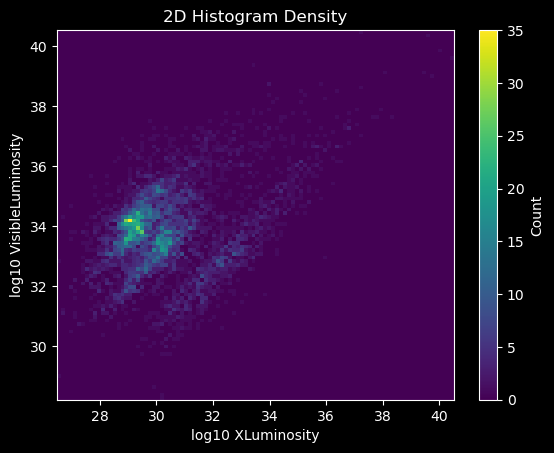

In [9]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

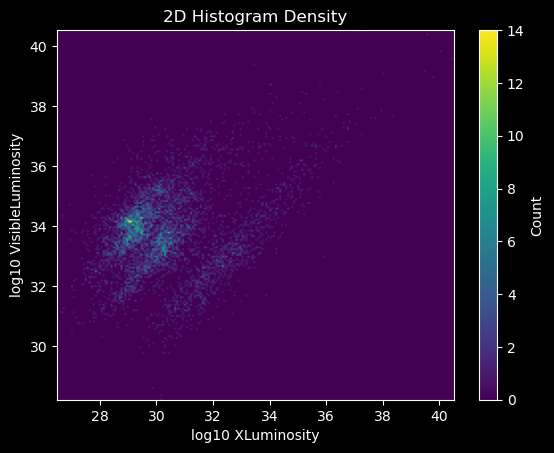

In [10]:
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=200)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

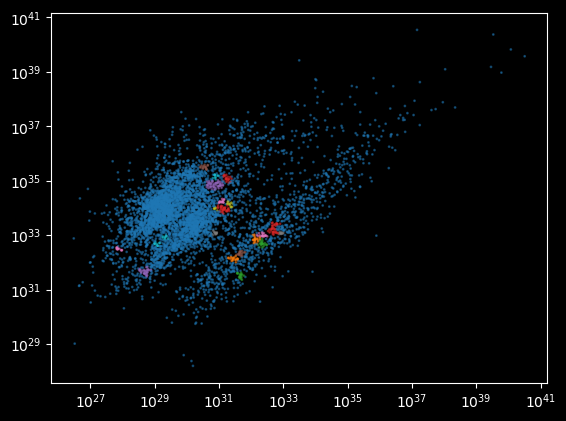

In [11]:
from sklearn.cluster import DBSCAN

X = np.column_stack([np.log10(x), np.log10(y)])
db = DBSCAN(eps=0.1, min_samples=10).fit(X)
labels = db.labels_

plt.scatter(x, y, c=labels, cmap='tab10', s=1, alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.show()
#not really useful

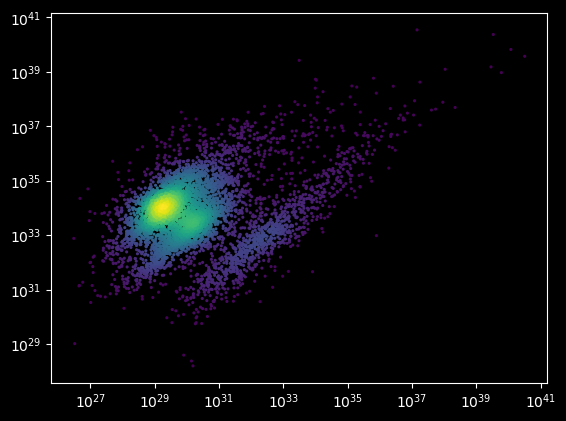

In [12]:
from scipy.stats import gaussian_kde
xy = np.vstack([np.log10(x), np.log10(y)])
z = gaussian_kde(xy)(xy)

plt.scatter(x, y, c=z, s=5, edgecolor='none')
plt.xscale('log')
plt.yscale('log')
plt.show()

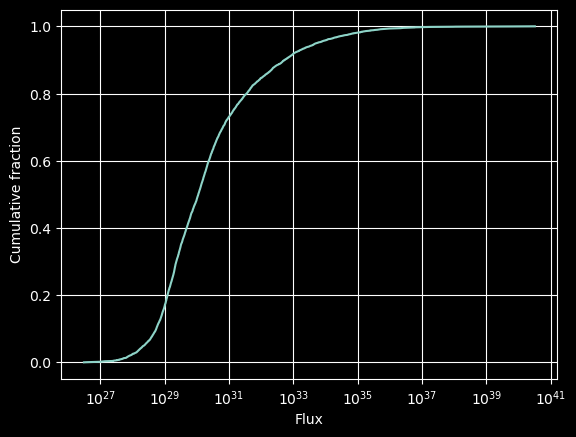

In [13]:

column = "XLuminosity"   
datas = data[column].dropna()            

sorted_data = np.sort(datas)
cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)

plt.plot(sorted_data, cdf)
plt.xscale('log')
plt.xlabel('Flux')
plt.ylabel('Cumulative fraction')
plt.grid(True)
plt.show()

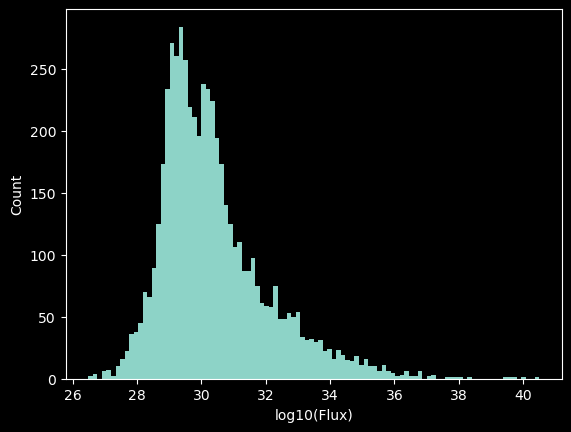

In [14]:
logF = np.log10(datas)
plt.hist(logF, bins=100)
plt.xlabel('log10(Flux)')
plt.ylabel('Count')
plt.show()

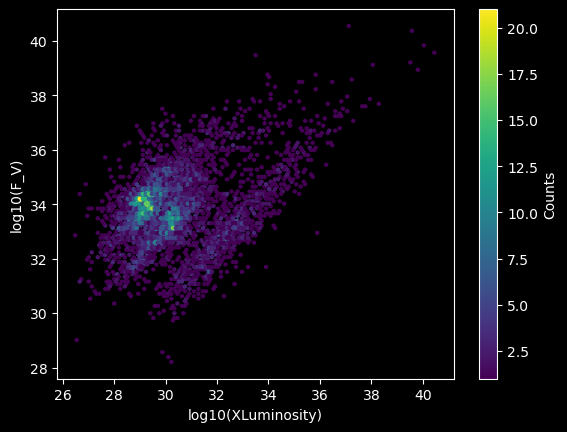

In [15]:

x = data["XLuminosity"].to_numpy()
y = data["VisibleLuminosity"].to_numpy()

# Filter non-positive values (log cannot take <=0)
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]

# Log transform
logx = np.log10(x)
logy = np.log10(y)

plt.hexbin(logx, logy, gridsize=120, mincnt=1)
plt.xlabel("log10(XLuminosity)")
plt.ylabel("log10(F_V)")
plt.colorbar(label="Counts")
plt.show()

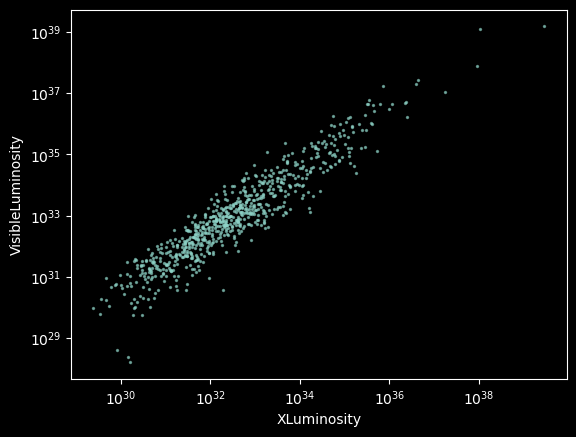

In [16]:
datatype=data[data["main_type"]=="QSO"]
x='XLuminosity'
y='VisibleLuminosity'
datatype.plot.scatter(x,y,  s=2, alpha=0.6)
plt.xscale("log")
plt.yscale("log")
plt.show()

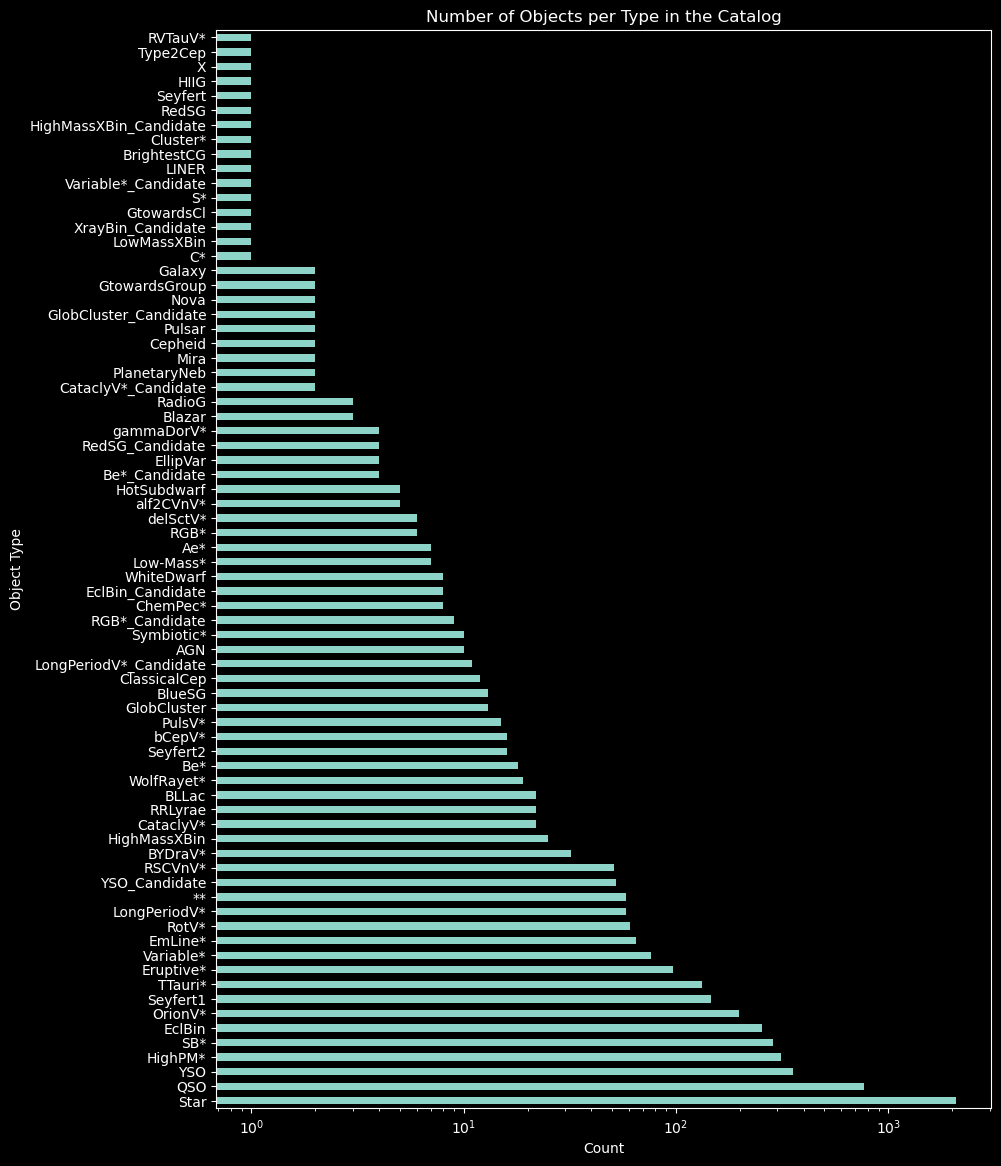

In [17]:
freq=data['main_type'].value_counts()


plt.figure(figsize=(10,14))
freq.plot(kind='barh')

plt.ylabel("Object Type")
plt.xlabel("Count")
plt.xscale("log")
plt.title("Elements in each Category")

plt.show()

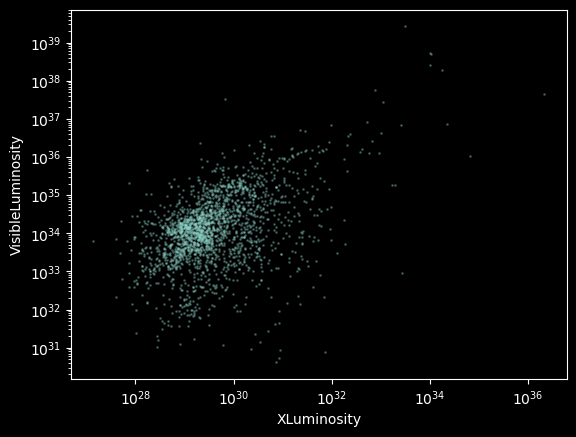

In [18]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y,  s=1, alpha=0.3)
plt.xscale("log")
plt.yscale("log")
plt.show()

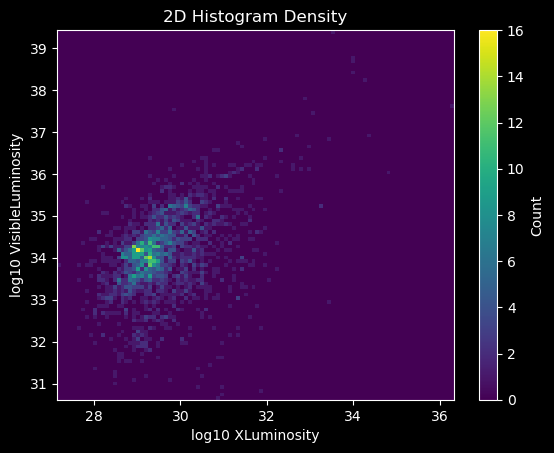

In [43]:
x = datatype["XLuminosity"].values
y = datatype["VisibleLuminosity"].values
mask = (x > 0) & (y > 0)
x = x[mask]
y = y[mask]
H, xedges, yedges = np.histogram2d(np.log10(x), np.log10(y), bins=100)
plt.imshow(H.T, origin='lower', cmap='viridis', aspect='auto',
           extent=[xedges.min(), xedges.max(), yedges.min(), yedges.max()])
plt.xlabel("log10 XLuminosity")
plt.ylabel("log10 VisibleLuminosity")
plt.title("2D Histogram Density")
plt.colorbar(label="Count")
plt.show()

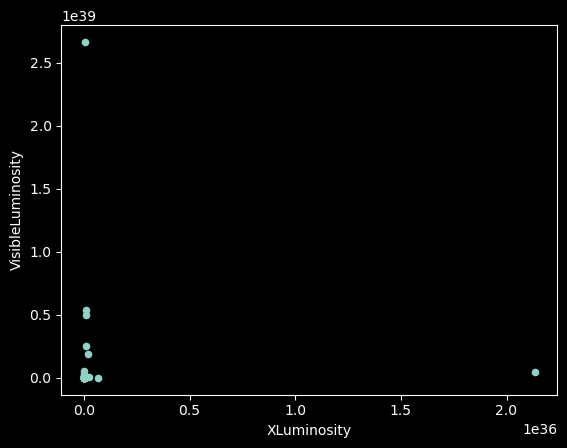

In [19]:
datatype=data[data["main_type"]=="Star"]
x='XLuminosity'
y='VisibleLuminosity'

datatype.plot.scatter(x,y)

plt.show()

In [20]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(10).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity
4646,770180201,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000
962,690742401,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000
996,690740601,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000
4891,763820101,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000
756,691970101,161.523000,-59.847100,4.5624e-14,8.5099e-15,HD 305525,161.523757,-59.847050,*,Star,X|NIR|*|**,0.022600,0.103100,10.680000,10.000000,10.030000,8.176000,7.962000,7.768000,nan,10.360000,9.720000,9.410000,nan,44247.787611,144316.814159,136534406194690273574912.000000,10687802036512415990141862656606208.000000,500208344696097645820355594409151037440.000000
1399,693270401,84.306500,26.564100,2.8147e-14,2.4502e-15,TYC 1869-1015-1,84.306580,26.564132,*,Star,NIR|*,0.018300,0.261600,10.730000,10.470000,nan,9.919000,9.823000,9.772000,nan,nan,nan,nan,nan,54644.808743,178227.322404,168616261202185786753024.000000,10056433069245981601466389889024000.000000,540699405097841047674830006271168479232.000000
915,690743701,83.255500,-68.781700,6.7220e-15,4.1662e-15,RM 1-591,83.255777,-68.780550,*,Star,NIR|*|MIR,0.009000,0.012400,15.700000,13.800000,nan,11.006000,10.177000,9.963000,nan,nan,nan,nan,nan,111111.111111,362395.555556,342853064444444497936384.000000,9929477428243772399683708850798592.000000,253749711762836467635327512029350068224.000000
707,690744701,81.621600,-69.450300,2.8454e-15,1.9325e-15,HD 269542,81.621420,-69.450924,*,Star,NIR|*|MIR,0.010400,0.017000,10.320000,9.900000,nan,9.596000,9.474000,9.397000,nan,nan,nan,nan,nan,96153.846154,313611.538462,296699767307692299780096.000000,3147647311546827240217313628127232.000000,2663475612910607634884153316623794569216.000000
4643,770180201,260.218000,57.920300,1.9270e-13,7.2159e-15,SDSS J172052.51+575510.5,260.218797,57.919595,*,Star,Opt|*,0.093300,0.281300,nan,19.982000,nan,nan,nan,nan,21.491000,20.328000,19.724000,19.385000,19.286000,10718.113612,34957.770632,33072642872454452084736.000000,2648638093051478720651799910416384.000000,905284868102792042041991397113856.000000
910,690743601,82.351000,-68.748700,2.0583e-14,8.9198e-15,W61 16-85,82.353248,-68.749533,*,Star,NIR|*|MIR,0.031100,0.027700,13.958000,14.008000,nan,14.480000,14.550000,14.548000,nan,nan,nan,nan,nan,32154.340836,104873.311897,99217928617363343671296.000000,2546212490127773290070302890393600.000000,6846061143251992451703948583234437120.000000


In [21]:
vdata=datatype.sort_values('XLuminosity', ascending=False)
vdata.head(15).style.format({c: "{:.4e}" for c in cols}).set_properties(**{
    "background-color": "#1e1e1e",
    "color": "#8ecae6",
    "border-color": "#444"
}).set_table_styles([
    {"selector": "th", "props": [("background-color", "#333"), ("color", "#8ecae6")]},
    {"selector": "td", "props": [("border", "1px solid #444")]},
])
#HD 269542 -- Red SuperGiant Star

,EXTraS_Ape_v0.OBS_ID,EXTraS_Ape_v0.XMM_RA,EXTraS_Ape_v0.XMM_DEC,EXTraS_Ape_v0.XMM_EP_8_FLUX,EXTraS_Ape_v0.XMM_EP_8_FLUX_ERR,main_id,ra,dec,otype,main_type,other_types,plx,plx_err,B,V,R,J,H,K,u,g,r,i,z,distance_pc,distance_ly,distance_cm,XLuminosity,VisibleLuminosity
4646,770180201,259.832000,57.995200,6.4391e-14,1.1349e-14,2MASS J17191999+5759430,259.833310,57.995309,*,Star,X|Opt|NIR|*|MIR|RG*,0.001900,0.096600,19.042000,18.412000,17.731000,16.536000,15.739000,15.779000,20.640000,18.837000,18.028000,17.682000,17.493000,526315.789474,1716610.526316,1624040831578947113189376.000000,2134186097765442353806513663071223808.000000,45254890288140069308574658575680405504.000000
962,690742401,76.981200,-68.418300,6.9706e-13,4.0539e-14,OGLE LMC118.4 46009,76.981132,-68.418135,*,Star,NIR|*,0.035400,0.028200,15.016000,14.945000,nan,14.770000,nan,14.350000,nan,14.800000,15.020000,15.210000,15.420000,28248.587571,92134.463277,87166033333333337833472.000000,66554161977587238460384833272020992.000000,1083180120752482433272548024735760384.000000
996,690740601,82.401100,-68.047000,4.0104e-14,1.1231e-14,2MASS J05293681-6802527,82.403324,-68.047956,*,Star,NIR|*,0.014600,0.033700,nan,15.190000,nan,15.066000,14.979000,14.601000,nan,nan,nan,nan,nan,68493.150685,223394.520548,211347779452054796238848.000000,22510680274824666108535077177655296.000000,7455144494608844568613495785310388224.000000
4891,763820101,76.975600,-68.677400,1.3636e-14,8.4718e-15,SOI 355,76.977914,-68.676708,*,Star,NIR|*|MIR,0.009700,0.013000,13.125000,13.000000,nan,12.586000,12.511000,12.501000,nan,nan,nan,nan,nan,103092.783505,336243.298969,318111090721649516871680.000000,17339833334460815884778580358463488.000000,187636059216819586735294890256503930880.000000
756,691970101,161.523000,-59.847100,4.5624e-14,8.5099e-15,HD 305525,161.523757,-59.847050,*,Star,X|NIR|*|**,0.022600,0.103100,10.680000,10.000000,10.030000,8.176000,7.962000,7.768000,nan,10.360000,9.720000,9.410000,nan,44247.787611,144316.814159,136534406194690273574912.000000,10687802036512415990141862656606208.000000,500208344696097645820355594409151037440.000000
1399,693270401,84.306500,26.564100,2.8147e-14,2.4502e-15,TYC 1869-1015-1,84.306580,26.564132,*,Star,NIR|*,0.018300,0.261600,10.730000,10.470000,nan,9.919000,9.823000,9.772000,nan,nan,nan,nan,nan,54644.808743,178227.322404,168616261202185786753024.000000,10056433069245981601466389889024000.000000,540699405097841047674830006271168479232.000000
915,690743701,83.255500,-68.781700,6.7220e-15,4.1662e-15,RM 1-591,83.255777,-68.780550,*,Star,NIR|*|MIR,0.009000,0.012400,15.700000,13.800000,nan,11.006000,10.177000,9.963000,nan,nan,nan,nan,nan,111111.111111,362395.555556,342853064444444497936384.000000,9929477428243772399683708850798592.000000,253749711762836467635327512029350068224.000000
707,690744701,81.621600,-69.450300,2.8454e-15,1.9325e-15,HD 269542,81.621420,-69.450924,*,Star,NIR|*|MIR,0.010400,0.017000,10.320000,9.900000,nan,9.596000,9.474000,9.397000,nan,nan,nan,nan,nan,96153.846154,313611.538462,296699767307692299780096.000000,3147647311546827240217313628127232.000000,2663475612910607634884153316623794569216.000000
4643,770180201,260.218000,57.920300,1.9270e-13,7.2159e-15,SDSS J172052.51+575510.5,260.218797,57.919595,*,Star,Opt|*,0.093300,0.281300,nan,19.982000,nan,nan,nan,nan,21.491000,20.328000,19.724000,19.385000,19.286000,10718.113612,34957.770632,33072642872454452084736.000000,2648638093051478720651799910416384.000000,905284868102792042041991397113856.000000
910,690743601,82.351000,-68.748700,2.0583e-14,8.9198e-15,W61 16-85,82.353248,-68.749533,*,Star,NIR|*|MIR,0.031100,0.027700,13.958000,14.008000,nan,14.480000,14.550000,14.548000,nan,nan,nan,nan,nan,32154.340836,104873.311897,99217928617363343671296.000000,2546212490127773290070302890393600.000000,6846061143251992451703948583234437120.000000
